<a href="https://colab.research.google.com/github/vincent-doan/applied-statistics/blob/main/telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning

In [ ]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load data in DataFrame
data = pd.read_csv('telco-customer-churn.csv')

## Data overview

In [ ]:
# 5 first records
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# 5 last records
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# Dataset size
data.shape

(7043, 21)

## Data cleaning

In [ ]:
# Details on columns in dataset: name, non-null count, data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data type change

The data type for TotalCharges column should be float64 rather than object.

In [ ]:
data["TotalCharges"] = data["TotalCharges"].astype(float) # Throws error: Cannot convert ' ' to float

This error suggests that though the TotalCharges column has no null value, there are indeed records where the TotalCharges value is left blank (' '). We want to identify and delete these rows.

In [ ]:
indices_to_delete = []
for i, x in enumerate(data["TotalCharges"].tolist()):
  if x == " ":
    indices_to_delete.append(i)
print(len(indices_to_delete))

11


### Missing value removal

In [ ]:
data.drop(indices_to_delete, axis=0, inplace=True)
data.shape

(7032, 21)

In [ ]:
data["TotalCharges"] = data["TotalCharges"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


The code works now, suggesting that we have fully deleted the 11 records without TotalCharges value. The data type for MonthlyCharges has been changed to float64, which would be more suitable for future computations. **7032** records remain.

### Duplicate removal

In [ ]:
data.drop_duplicates().shape

(7032, 21)

We can see that none of the records are duplicates of one another, so there is no need to consider duplicate removal

## Numeric to categorical conversion

In [ ]:
data["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64

The nature of this column is categorical, despite being presented in the dataset as integer 0s and 1s. For the sheer sake of cohesion, these 0s and 1s will be converted into "No" and "Yes"

In [ ]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace({0: "No", 1: "Yes"})
data["SeniorCitizen"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

## Categorical to numeric conversion

In [ ]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Overall, the majority of the dataset deals with categorical values. Many of these (gender, SeniorCitizen, Partner,...) are binary variables, while others take on more values (3-4).

# Basic descriptive statistics

## Output
**Churn** is the observation of whether a customer continues or stops subscribing to a service (in this case, Telco). Specifically, churn being **no** corresponds to a continuation, while churning being **yes** corresponds to a termination of service.

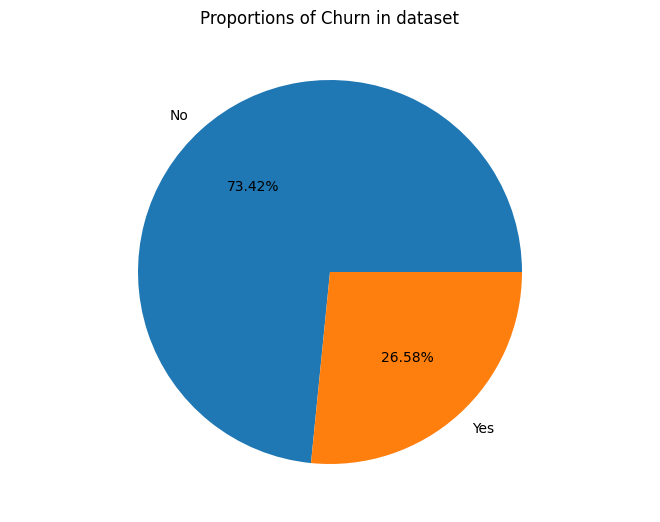

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

labels = data["Churn"].unique().tolist()
count = data["Churn"].value_counts().tolist()

ax.pie(count, labels=labels, autopct='%1.2f%%')
plt.title("Proportions of Churn in dataset")
plt.show()

We can see that the dataset contains an inherent imbalance in its output. Only a quarter of customers cancelled their subscription, while the rest continues.

## Numeric data

In [ ]:
# Summary statistics of numeric data
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The average customer spends approx. **32 months** with TelCo, spending about **65 dollars** monthly, and accumulating a total charge of around **2300 dollars**</br>
Month-wise, the most valuable customer spends nearly **119 dollars** a month, while overall, the most valuable customer spends a total of **8685 dollars**. The most loyal customer(s) subscribes to TelCo services for **72 months**.

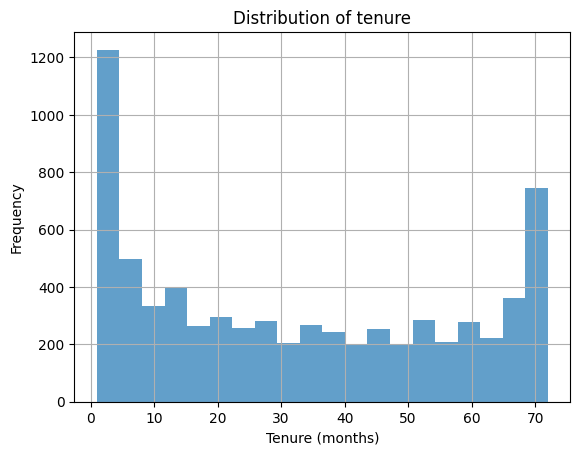

In [ ]:
data["tenure"].hist(bins=20, grid=True, alpha=0.7)
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.title("Distribution of tenure")
plt.show()

There are many newcomers in the dataset (**more than 1200**), with a tenure just about 5-6 months. At the other end of the spectrum, there is also a major group of loyal subscribers (**nearly 800**) with around 70-month tenure. These two groups are the main demographic of interest to us. In the middle ground, an almost uniform distribution can be seen.

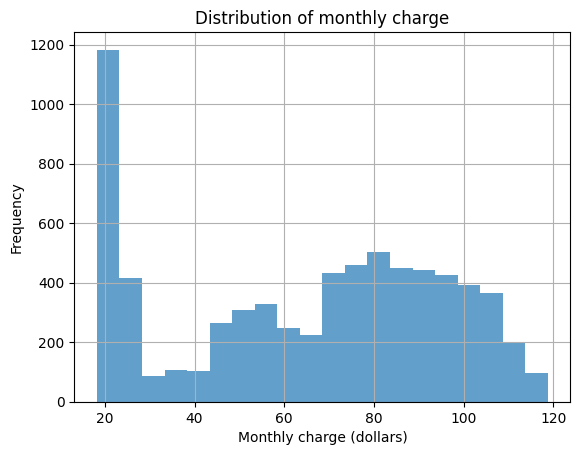

In [ ]:
data["MonthlyCharges"].hist(bins=20, grid=True, alpha=0.7)
plt.xlabel("Monthly charge (dollars)")
plt.ylabel("Frequency")
plt.title("Distribution of monthly charge")
plt.show()

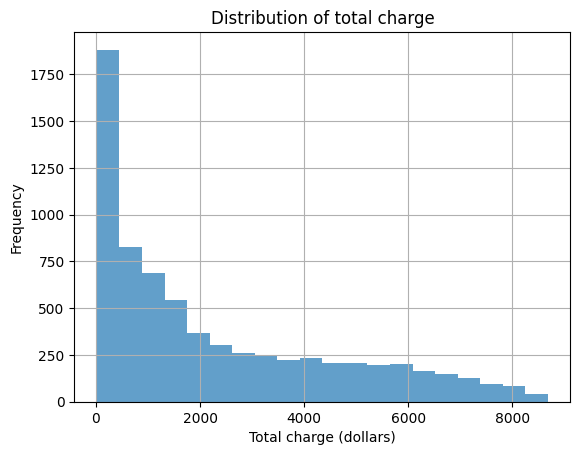

In [ ]:
data["TotalCharges"].hist(bins=20, grid=True, alpha=0.7)
plt.xlabel("Total charge (dollars)")
plt.ylabel("Frequency")
plt.title("Distribution of total charge")
plt.show()

In [ ]:
data.groupby

## Categorical data

### Demographic information

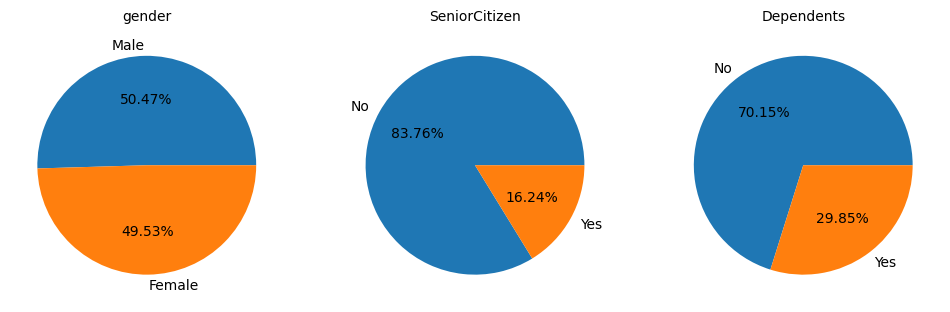

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# gender (M-F)
labels = ["Male", "Female"]
count = data["gender"].value_counts().tolist()
axes[0].pie(count, labels=labels, autopct='%1.2f%%')
axes[0].set_title("gender", fontsize=10)

# SeniorCitizen (Y-N)
labels = data["SeniorCitizen"].unique().tolist()
count = data["SeniorCitizen"].value_counts().tolist()
axes[1].pie(count, labels=labels, autopct='%1.2f%%')
axes[1].set_title("SeniorCitizen", fontsize=10)

# Dependents (Y-N)
labels = data["Dependents"].unique().tolist()
count = data["Dependents"].value_counts().tolist()
axes[2].pie(count, labels=labels, autopct='%1.2f%%')
axes[2].set_title("Dependents", fontsize=10)

plt.show()

Gender-wise, the dataset is relatively **balanced**.</br>
From values in SeniorCitizen, we can see that **non-seniors** are a major demographic in the dataset.</br>
Likewise for people with **no dependent**.</br>
This is a simple univariate survey, and we'd better examine the interaction between these 3 different demographic features.

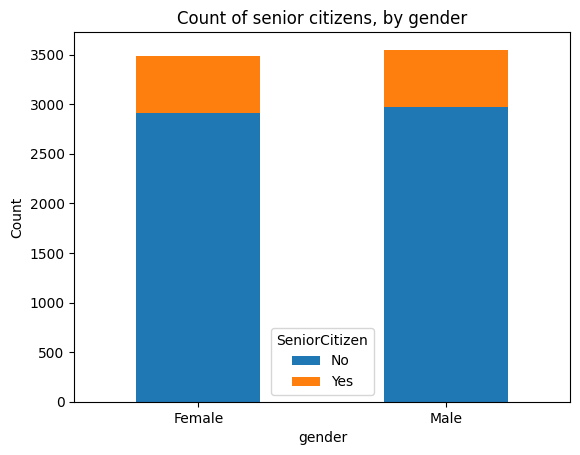

In [ ]:
ax = data.groupby("gender")["SeniorCitizen"].value_counts().unstack(level=1).plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.xlabel("gender")
plt.ylabel("Count")
plt.title("Count of senior citizens, by gender")
plt.show()

This plot confirms that in the dataset, gender remains mostly **balanced**, regardless of whether the customers are senior citizens are not.

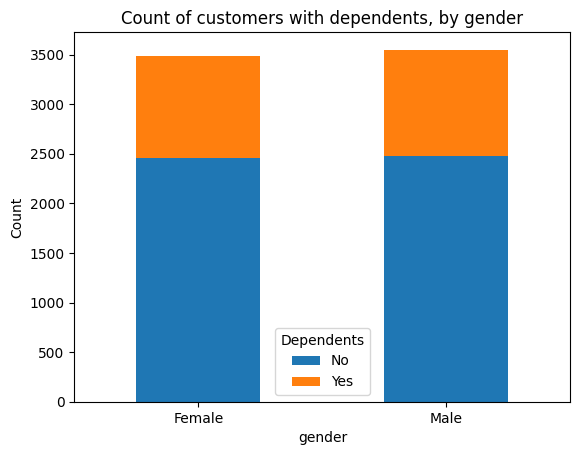

In [ ]:
ax = data.groupby("gender")["Dependents"].value_counts().unstack(level=1).plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.xlabel("gender")
plt.ylabel("Count")
plt.title("Count of customers with dependents, by gender")
plt.show()

Likewise, this plot confirms that in the dataset, gender remains mostly **balanced**, regardless of whether the customers have dependents or not.

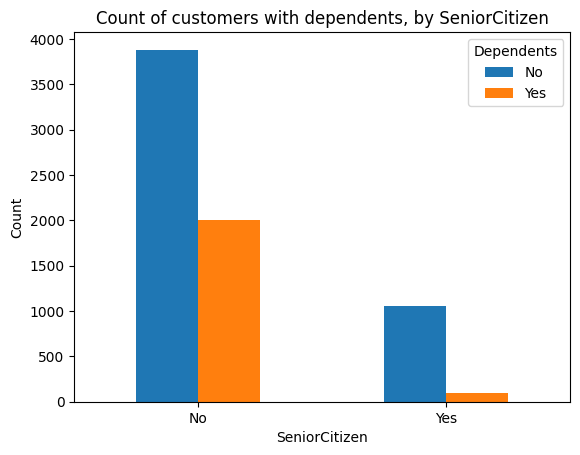

In [ ]:
ax = data.groupby("SeniorCitizen")["Dependents"].value_counts().unstack(level=1).plot(kind='bar', stacked=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.xlabel("SeniorCitizen")
plt.ylabel("Count")
plt.title("Count of customers with dependents, by SeniorCitizen")
plt.show()

This graph reaffirms that in the dataset, the number of seniors exceeds non-seniors, and the number of customers without dependents exceeds those with. However, it is also notable that in the dataset, non-seniors are more likely to have dependents.

### Demographic-output relations

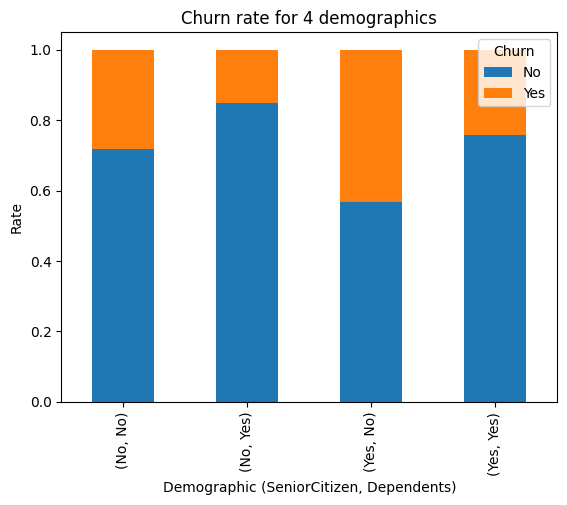

In [ ]:
data.groupby(["SeniorCitizen", "Dependents"])["Churn"].value_counts(normalize=True).unstack(level=2).plot(kind="bar", stacked=True)

plt.xlabel("Demographic (SeniorCitizen, Dependents)")
plt.ylabel("Rate")
plt.title("Churn rate for 4 demographics")
plt.show()

Since it is established that gender is balanced when grouped by any other demographic information (SeniorCitizen, Dependents), this plot does not split into gender-based demographics.</br>
From this plot, it is clear that seniors and people with no dependents are more likely to churn. Seniors with no dependents are the demographic most likely to terminate their TelCo's subscription (over **40 percent**)